# Import Dependencies

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Load Dataset

In [ ]:
iris_df = datasets.load_iris()
iris = pd.DataFrame(iris_df.data, columns=iris_df.feature_names)
iris["species"] = iris_df.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

# Visualize Data

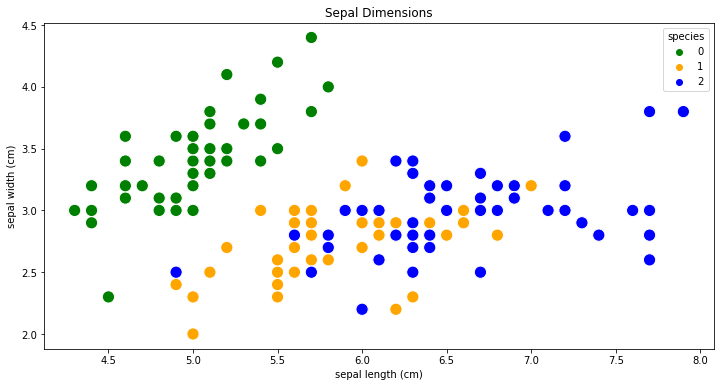

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris["sepal length (cm)"],y=iris["sepal width (cm)"], 
                hue=iris["species"],palette = ["green","orange","blue"],s=150);

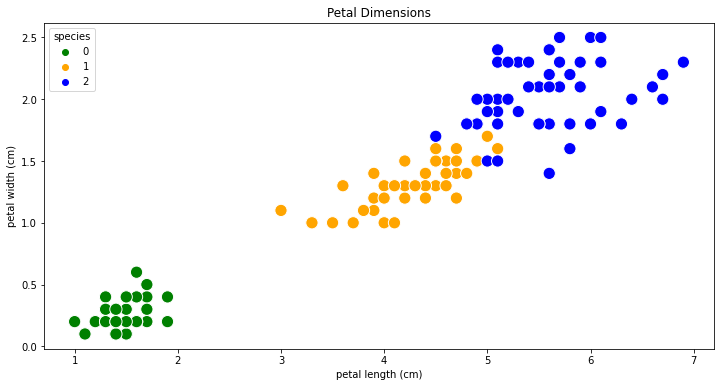

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris["petal length (cm)"],y=iris["petal width (cm)"],
                hue=iris["species"],palette = ["green","orange","blue"],s=150);

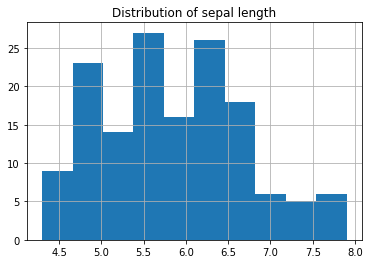

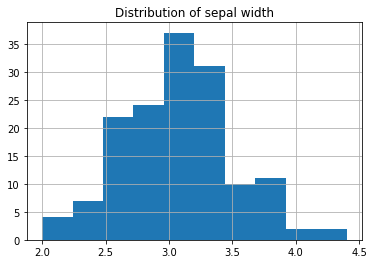

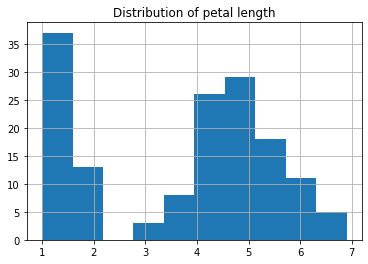

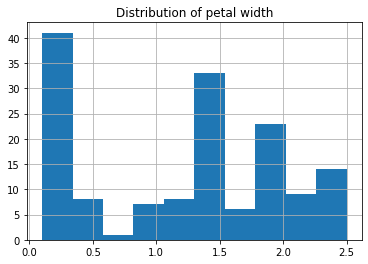

In [ ]:
iris['sepal length (cm)'].hist()
plt.title('Distribution of sepal length')
plt.show()

iris['sepal width (cm)'].hist()
plt.title('Distribution of sepal width')
plt.show()

iris['petal length (cm)'].hist()
plt.title('Distribution of petal length')
plt.show()

iris['petal width (cm)'].hist()
plt.title('Distribution of petal width')
plt.show()


# Column Correlation Graph

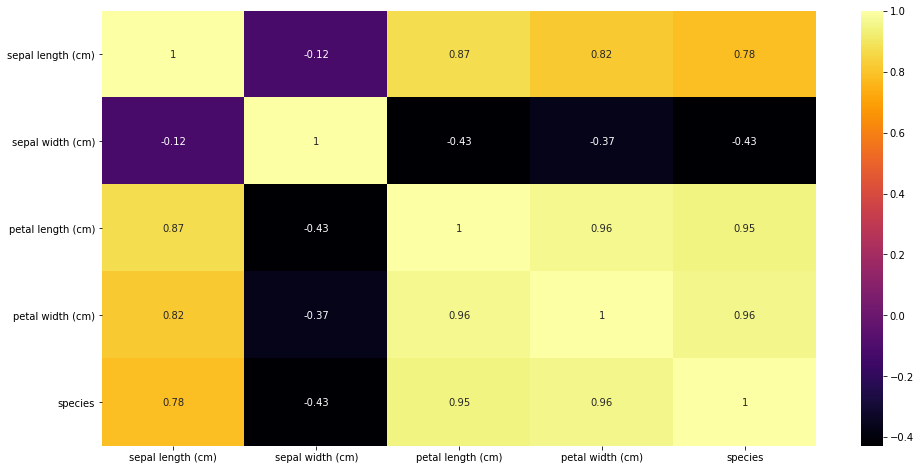

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(iris.corr(), annot=True, cmap='inferno');

#Divide and Fit Datset

In [ ]:
x=iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y=iris['species']
print(x.shape,y.shape)

(150, 4) (150,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [ ]:
dect=DecisionTreeClassifier()
dect.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Carry out Predictions and Scores

In [ ]:
pred = dect.predict(x_test)
print("The accuracy of model is:", metrics.accuracy_score(pred, y_test))

The accuracy of model is: 0.9777777777777777


In [ ]:
pd.DataFrame(np.c_[y_test,pred], columns = ["Real Value","Predicted Value"])

,Real Value,Predicted Value
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,2,2
6,2,2
7,1,1
8,2,2
9,0,0


In [ ]:
plt.figure(figsize=(16,8))
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(dect, x_test, y_test, cmap='viridis');

NameError: ignored

# Plot Decision Tree 

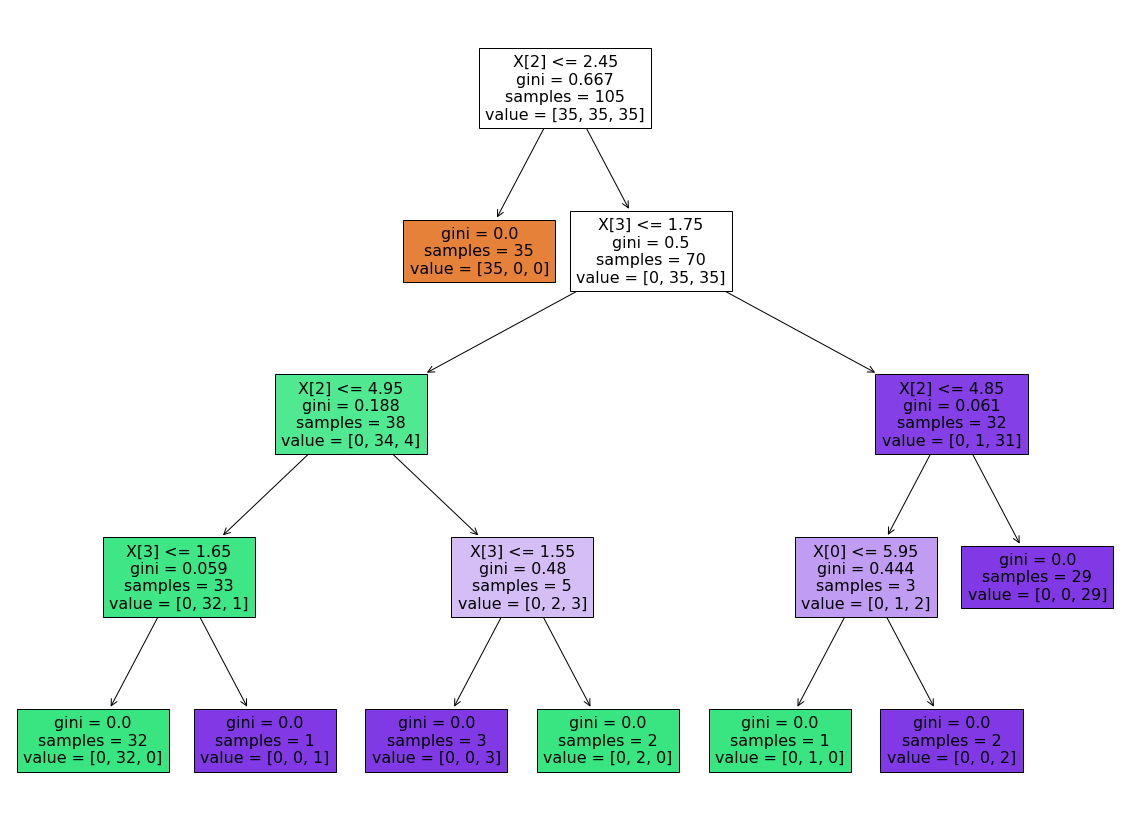

In [ ]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(dect,filled=True);